In [1]:
import numpy as np  # Array manipulation
from sklearn.feature_extraction.text import TfidfVectorizer # Feature Extraction
from sklearn.metrics.pairwise import cosine_similarity # Cosine Similarity
from sklearn.cluster import KMeans # K-Means clustering
from sklearn.metrics import silhouette_score # Silhouette Score
import matplotlib.pyplot as plt # Visualization

In [2]:
documents = [
    "The game was exciting and the crowd cheered",
    "A thrilling match with great goals and skill",
    "Local election debate focuses on public policy",
    "Vote today for better public services in the city",
    "New phone release: innovative camera and battery life",
    "Latest smartphone review praises camera and battery",
    "Delicious recipe for homemade pizza with fresh tomatoes",
    "Try this easy pizza recipe with a crispy crust",
    "The concert was amazing with incredible music",
    "Live performance wowed the audience with stunning vocals",
    "Art exhibition features modern paintings and sculptures",
    "Gallery showcases contemporary art from local artists",
    "Science experiment explores the properties of water",
    "Research paper investigates climate change effects",
    "Travel guide to Paris highlights famous landmarks",
    "Explore historical sites and museums in Rome",
    "Fitness routine for weight loss and muscle gain",
    "Healthy lifestyle tips for better physical health",
    "Stock market analysis predicts future trends",
    "Financial news discusses economic growth and inflation",
    "Cooking class teaches how to bake bread",
    "Learn to prepare gourmet meals at home",
    "Gardening tips for planting flowers and vegetables",
    "Grow your own organic produce in your backyard",
    "Software update improves performance and security",
    "New app release offers exciting features and design",
    "History lesson on the American Civil War",
    "Documentary explores ancient civilizations and cultures",
    "Yoga practice for relaxation and stress relief",
    "Meditation techniques for mental clarity and focus",
    "Sports team wins championship after tough season",
    "Athlete breaks world record in track and field",
    "Political campaign rally draws large crowds",
    "Government announces new economic stimulus plan",
    "Tech company launches innovative new product",
    "Review of the latest gadget praises its usability",
    "Food blog shares recipes for healthy smoothies",
    "Restaurant review highlights the best dishes",
    "Nature documentary explores wildlife in the Amazon",
    "Environmental report discusses conservation efforts",
    "Educational workshop on coding for beginners",
    "Online course teaches advanced programming concepts",
    "Book club discusses the latest bestseller novel",
    "Author interview reveals inspiration behind the story",
    "DIY project for building a birdhouse",
    "Craft fair showcases handmade jewelry and pottery",
    "Music festival features diverse artists and genres",
    "Theater performance receives critical acclaim",
    "Health study examines the benefits of exercise",
    "Medical research discovers new treatment for disease"
]

In [3]:
# Step2 : Feature extraction
vectorizer = TfidfVectorizer(stop_words="english") # feature extraction to remove stop words
X = vectorizer.fit_transform(documents)

In [4]:
# Step 3 : Cosine Similarity matrix
cos_sim=cosine_similarity(X)
print("Cosine similarity matrix ")
print(np.round(cos_sim,2))


# Apply K-meand
k=3
kmeans= KMeans(n_clusters=k,random_state=42)
labels=kmeans.fit_predict(X)

# Print clusters
print("Document Clusters : ")
for i in range(k):
    print(f"\n Cluster {i}")
    for j,doc in enumerate(documents):
        if labels[j]==i:
            print(f"- {doc}")

Cosine similarity matrix 
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Document Clusters : 

 Cluster 0
- Stock market analysis predicts future trends

 Cluster 1
- The game was exciting and the crowd cheered
- A thrilling match with great goals and skill
- New phone release: innovative camera and battery life
- Latest smartphone review praises camera and battery
- Delicious recipe for homemade pizza with fresh tomatoes
- Try this easy pizza recipe with a crispy crust
- The concert was amazing with incredible music
- Live performance wowed the audience with stunning vocals
- Art exhibition features modern paintings and sculptures
- Science experiment explores the properties of water
- Research paper investigates climate change effects
- Travel guide to Paris highlights famous landmarks
- Explore historical sites and museums in Rome
- Fitness routine for weight loss and muscle 

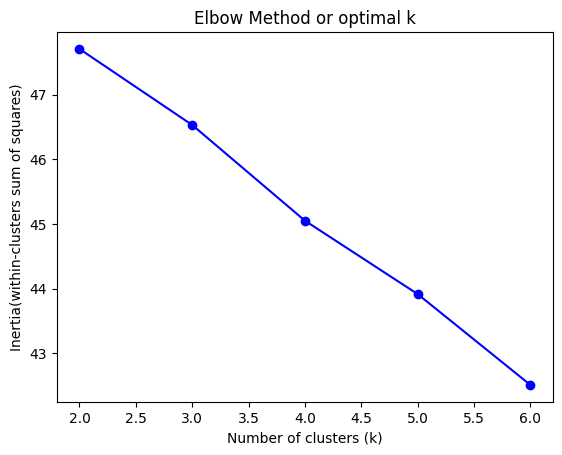

In [5]:
# Step4 : ELbow method

inertia=[]
k_range=range(2,7) # TEST 2-6 CLUSTERS
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(k_range,inertia,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia(within-clusters sum of squares)')
plt.title('Elbow Method or optimal k')
plt.show()

In [6]:
# Step5 : Silhouette scores
silhouette_scores=[]
k_range=range(2,7)
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    labels=km.fit_predict(X)
    sil_score=silhouette_score(X,labels,metric='cosine')
    print(f"Silhouette score for k={k}: {sil_score:.3f}")
    silhouette_scores.append(sil_score)

Silhouette score for k=2: 0.006
Silhouette score for k=3: 0.007
Silhouette score for k=4: 0.016
Silhouette score for k=5: 0.018
Silhouette score for k=6: 0.030


In [7]:
# Step6 : Choose best k and show clusters

best_k=3 # from elbow silhouette clusters
kmeans=KMeans(n_clusters=best_k,random_state=42)
labels=kmeans.fit_predict(X)